# Heart disease prediction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

import pickle
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Importing the data from the csv file

In [2]:
df = pd.read_csv('Data/heart.csv')

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.shape

(918, 12)

In [5]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
df['HeartDisease'] = df['HeartDisease'].astype(str)

Separating the data frame in a test and train set

In [7]:
X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualizing the data with bar plots

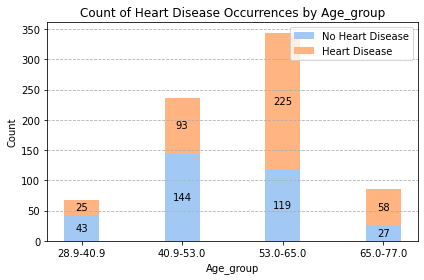

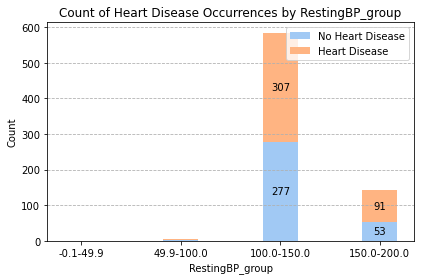

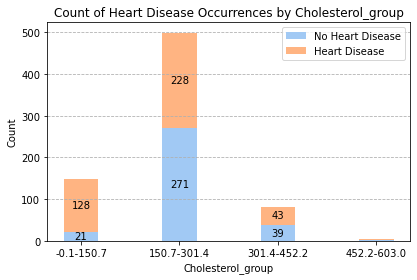

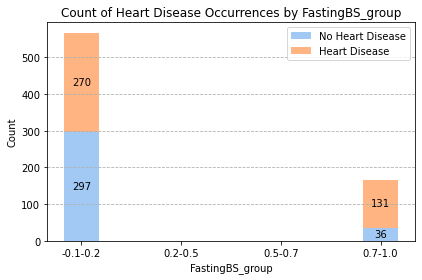

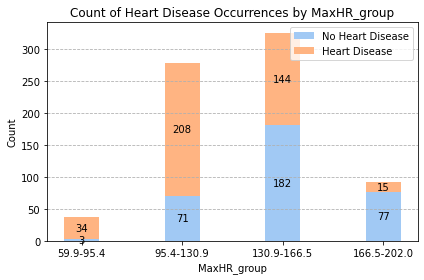

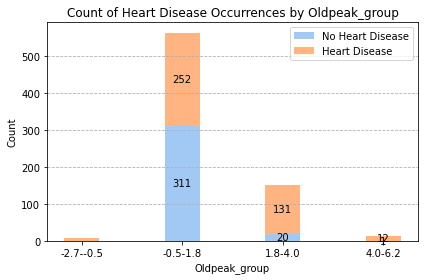

In [24]:
columns = ["Age", "RestingBP", "Cholesterol", "FastingBS", "MaxHR", "Oldpeak"]

df2 = pd.concat([X_train, y_train], axis=1)

# Reset the index of the concatenated DataFrame
df2.reset_index(drop=True, inplace=True)

import seaborn as sns

# Assume 'df2' contains the concatenated DataFrame as described in your code
# and 'columns' contains the list of columns to analyze

# Set the Seaborn color palette
sns.set_palette("pastel")

# Threshold for showing annotations (total count greater than or equal to this threshold will be annotated)
annotation_threshold = 10

for column in columns:
    max_value = df2[column].max()
    min_value = df2[column].min() - 0.1

    num_intervals = 5
    intervals = np.linspace(min_value, max_value, num_intervals)
    labels = [f"{intervals[i]:.1f}-{intervals[i + 1]:.1f}" for i in range(intervals.shape[0] - 1)]
    column_name = column + "_group"

    # Create a new column 'column_name' based on defined intervals
    df2[column_name] = pd.cut(df2[column], bins=intervals, labels=labels)

    # Group by 'column_name' and 'HeartDisease', and count the occurrences
    grouped_df = df2.groupby([column_name, 'HeartDisease']).size().unstack(fill_value=0)

    # Convert column names to integers
    grouped_df.columns = grouped_df.columns.astype(int)

    # Plot the stacked bar chart using Matplotlib
    fig, ax = plt.subplots()

    width = 0.35
    ind = np.arange(len(grouped_df))

    p1 = ax.bar(ind, grouped_df[0], width, label='No Heart Disease')
    p2 = ax.bar(ind, grouped_df[1], width, bottom=grouped_df[0], label='Heart Disease')

    # Add annotations for bars with a total count greater than or equal to the threshold
    for i, (value_0, value_1) in enumerate(zip(grouped_df[0], grouped_df[1])):
        total = value_0 + value_1
        if total >= annotation_threshold:
            ax.annotate(f"{value_0}", xy=(ind[i], value_0 / 2), ha='center', va='center', color='black', fontsize=10)
            ax.annotate(f"{value_1}", xy=(ind[i], value_0 + value_1 / 2), ha='center', va='center', color='black', fontsize=10)

    # Add labels and title
    ax.set_xlabel(column_name)
    ax.set_ylabel('Count')
    ax.set_title('Count of Heart Disease Occurrences by ' + column_name)
    ax.set_xticks(ind)
    ax.set_xticklabels(labels)
    ax.legend(loc='upper right')

    # Add gridlines
    ax.yaxis.grid(True, linestyle='--')

    # Show the plot
    plt.tight_layout()
    plt.show()

    df2.drop(column_name, axis=1, inplace=True)

In [10]:
# Creating a data frame with only categorical values and the target value
new_df = df2.drop(["Age", "RestingBP", "Cholesterol", "FastingBS", "MaxHR", "Oldpeak"], axis=1)

In [11]:
new_df.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope,HeartDisease
0,M,NAP,Normal,N,Down,0
1,M,NAP,Normal,N,Up,0
2,M,ASY,Normal,Y,Flat,1
3,F,NAP,Normal,N,Up,0
4,M,ASY,Normal,N,Flat,1


In [12]:
columns = ["Age", "RestingBP", "Cholesterol", "FastingBS", "MaxHR", "Oldpeak"]

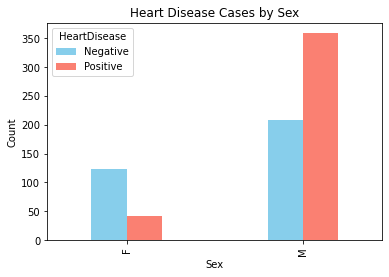

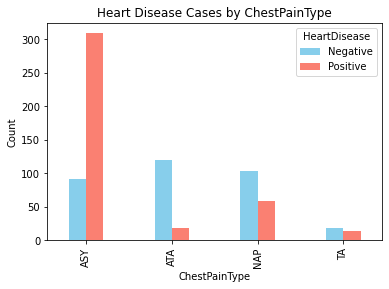

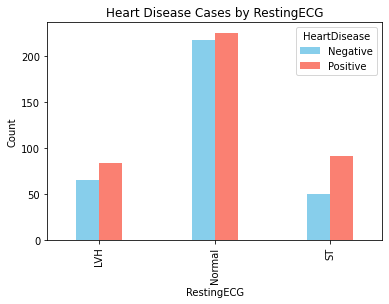

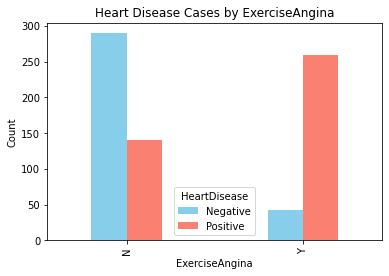

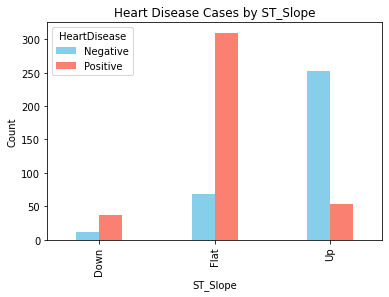

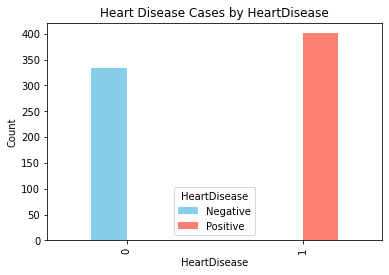

In [51]:
for column in new_df.columns:    
    # Group the data by "sex" and count occurrences of positive and negative cases
    grouped_data = new_df.groupby(column)['HeartDisease'].value_counts().unstack(fill_value=0)

    # Create the bar plot with side-by-side bars
    grouped_data.plot(kind='bar', position=0.5, width=0.4, color=['skyblue', 'salmon'])

    # Add labels and title
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title('Heart Disease Cases by ' + column)

    # Show the plot
    plt.legend(title='HeartDisease', labels=['Negative', 'Positive'])
    plt.show()

# Training the model with only numerical values

In [53]:
numerical_columns = X_train.select_dtypes(include='number')

In [54]:
numerical_columns.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
405,35,120,0,1,130,1.2,0,1,1,0,0,0,0,1,0,0,1,0,1,0
123,58,180,393,0,110,1.0,1,0,0,1,0,0,0,1,0,0,1,0,1,0
743,52,134,201,0,158,0.8,0,1,0,1,0,0,0,1,0,1,0,0,0,1
648,59,170,326,0,140,3.4,0,1,1,0,0,0,1,0,0,0,1,1,0,0
526,65,144,312,0,113,1.7,0,1,1,0,0,0,1,0,0,0,1,0,1,0


In [55]:
print(y_train.shape)
print(X_train.shape)
print(numerical_columns.shape)

(587,)
(587, 20)
(587, 20)


In [56]:
# Create and train the Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(numerical_columns, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test.select_dtypes(include='number'))

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report and confusion matrix
print("Classification Report:")
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

print("Confusion Matrix:")
confusion_mat = confusion_matrix(y_test, y_pred)
print(confusion_mat)

Accuracy: 0.891156462585034
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.82      0.87        67
           1       0.86      0.95      0.90        80

    accuracy                           0.89       147
   macro avg       0.90      0.89      0.89       147
weighted avg       0.89      0.89      0.89       147

Confusion Matrix:
[[55 12]
 [ 4 76]]


C:\Users\andre\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


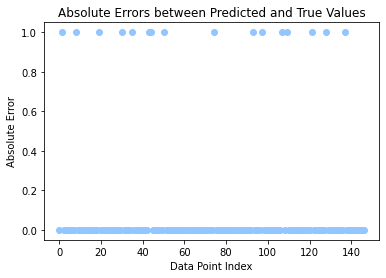

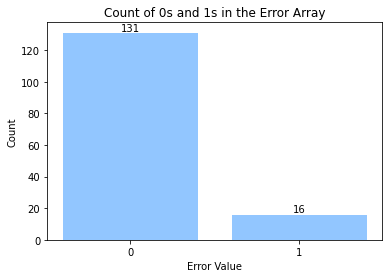

In [57]:
# Calculate absolute errors
error = np.abs(y_pred.astype('int32') - y_test.astype('int32'))

# Generate x-coordinates for the scatter plot
x_values = np.arange(len(error))

# Plot the scatter plot
plt.scatter(x_values, error)
plt.xlabel('Data Point Index')
plt.ylabel('Absolute Error')
plt.title('Absolute Errors between Predicted and True Values')
plt.show()

counts = np.bincount(error)

# Plot the bar chart
plt.bar([0, 1], counts)
plt.xticks([0, 1], ['0', '1'])
plt.xlabel('Error Value')
plt.ylabel('Count')
plt.title('Count of 0s and 1s in the Error Array')

# Add values on top of the bars
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()


# Training the model with numerical and categorical features

In [58]:
#X_train.drop("Age_group", axis = 1, inplace = True)

In [79]:
categorical_columns = X_train.select_dtypes(include='object').columns.tolist()
print(categorical_columns)
df_encoded = pd.get_dummies(X_train, columns=categorical_columns)
df_encoded_test = pd.get_dummies(X_test, columns=categorical_columns)

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


In [60]:
df_encoded.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
405,35,120,0,1,130,1.2,0,1,1,0,0,0,0,1,0,0,1,0,1,0
123,58,180,393,0,110,1.0,1,0,0,1,0,0,0,1,0,0,1,0,1,0
743,52,134,201,0,158,0.8,0,1,0,1,0,0,0,1,0,1,0,0,0,1
648,59,170,326,0,140,3.4,0,1,1,0,0,0,1,0,0,0,1,1,0,0
526,65,144,312,0,113,1.7,0,1,1,0,0,0,1,0,0,0,1,0,1,0


In [61]:
X_train.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
405,35,120,0,1,130,1.2,0,1,1,0,0,0,0,1,0,0,1,0,1,0
123,58,180,393,0,110,1.0,1,0,0,1,0,0,0,1,0,0,1,0,1,0
743,52,134,201,0,158,0.8,0,1,0,1,0,0,0,1,0,1,0,0,0,1
648,59,170,326,0,140,3.4,0,1,1,0,0,0,1,0,0,0,1,1,0,0
526,65,144,312,0,113,1.7,0,1,1,0,0,0,1,0,0,0,1,0,1,0


In [63]:
# Create and train the Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(df_encoded, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(df_encoded_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report and confusion matrix
print("Classification Report:")
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

print("Confusion Matrix:")
confusion_mat = confusion_matrix(y_test, y_pred)
print(confusion_mat)


Accuracy: 0.891156462585034
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.82      0.87        67
           1       0.86      0.95      0.90        80

    accuracy                           0.89       147
   macro avg       0.90      0.89      0.89       147
weighted avg       0.89      0.89      0.89       147

Confusion Matrix:
[[55 12]
 [ 4 76]]


C:\Users\andre\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Training the model with the features with higer correlation 

In [64]:
from scipy import stats

for column in df_encoded.columns:
    # Assuming 'target' is the binary target variable and 'feature' is the continuous feature
    correlation_coefficient, _ = stats.pointbiserialr(y_train.astype("int32"),df_encoded[column])
    if abs(correlation_coefficient) > 0.4:
        print(column)
        print("Point-Biserial Correlation Coefficient:", correlation_coefficient)

MaxHR
Point-Biserial Correlation Coefficient: -0.40161346347986754
Oldpeak
Point-Biserial Correlation Coefficient: 0.4294486776434083
ChestPainType_ASY
Point-Biserial Correlation Coefficient: 0.49236040118839974
ExerciseAngina_N
Point-Biserial Correlation Coefficient: -0.5049597279201907
ExerciseAngina_Y
Point-Biserial Correlation Coefficient: 0.5049597279201907
ST_Slope_Flat
Point-Biserial Correlation Coefficient: 0.5516038742954558
ST_Slope_Up
Point-Biserial Correlation Coefficient: -0.6001651831765384


In [65]:
after_feature = ["MaxHR", "Oldpeak", "ChestPainType_ASY", "ExerciseAngina_N", "ExerciseAngina_Y", "ST_Slope_Flat", "ST_Slope_Up"]
df_after = df_encoded[after_feature]
df_after_teste = df_encoded_test[after_feature]

In [66]:
df_after.head()

,MaxHR,Oldpeak,ChestPainType_ASY,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
405,130,1.2,1,0,1,1,0
123,110,1.0,0,0,1,1,0
743,158,0.8,0,1,0,0,1
648,140,3.4,1,0,1,0,0
526,113,1.7,1,0,1,1,0


In [67]:
# Create and train the Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(df_after, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(df_after_teste)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report and confusion matrix
print("Classification Report:")
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

print("Confusion Matrix:")
confusion_mat = confusion_matrix(y_test, y_pred)
print(confusion_mat)


Accuracy: 0.8571428571428571
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.79      0.83        67
           1       0.84      0.91      0.87        80

    accuracy                           0.86       147
   macro avg       0.86      0.85      0.85       147
weighted avg       0.86      0.86      0.86       147

Confusion Matrix:
[[53 14]
 [ 7 73]]


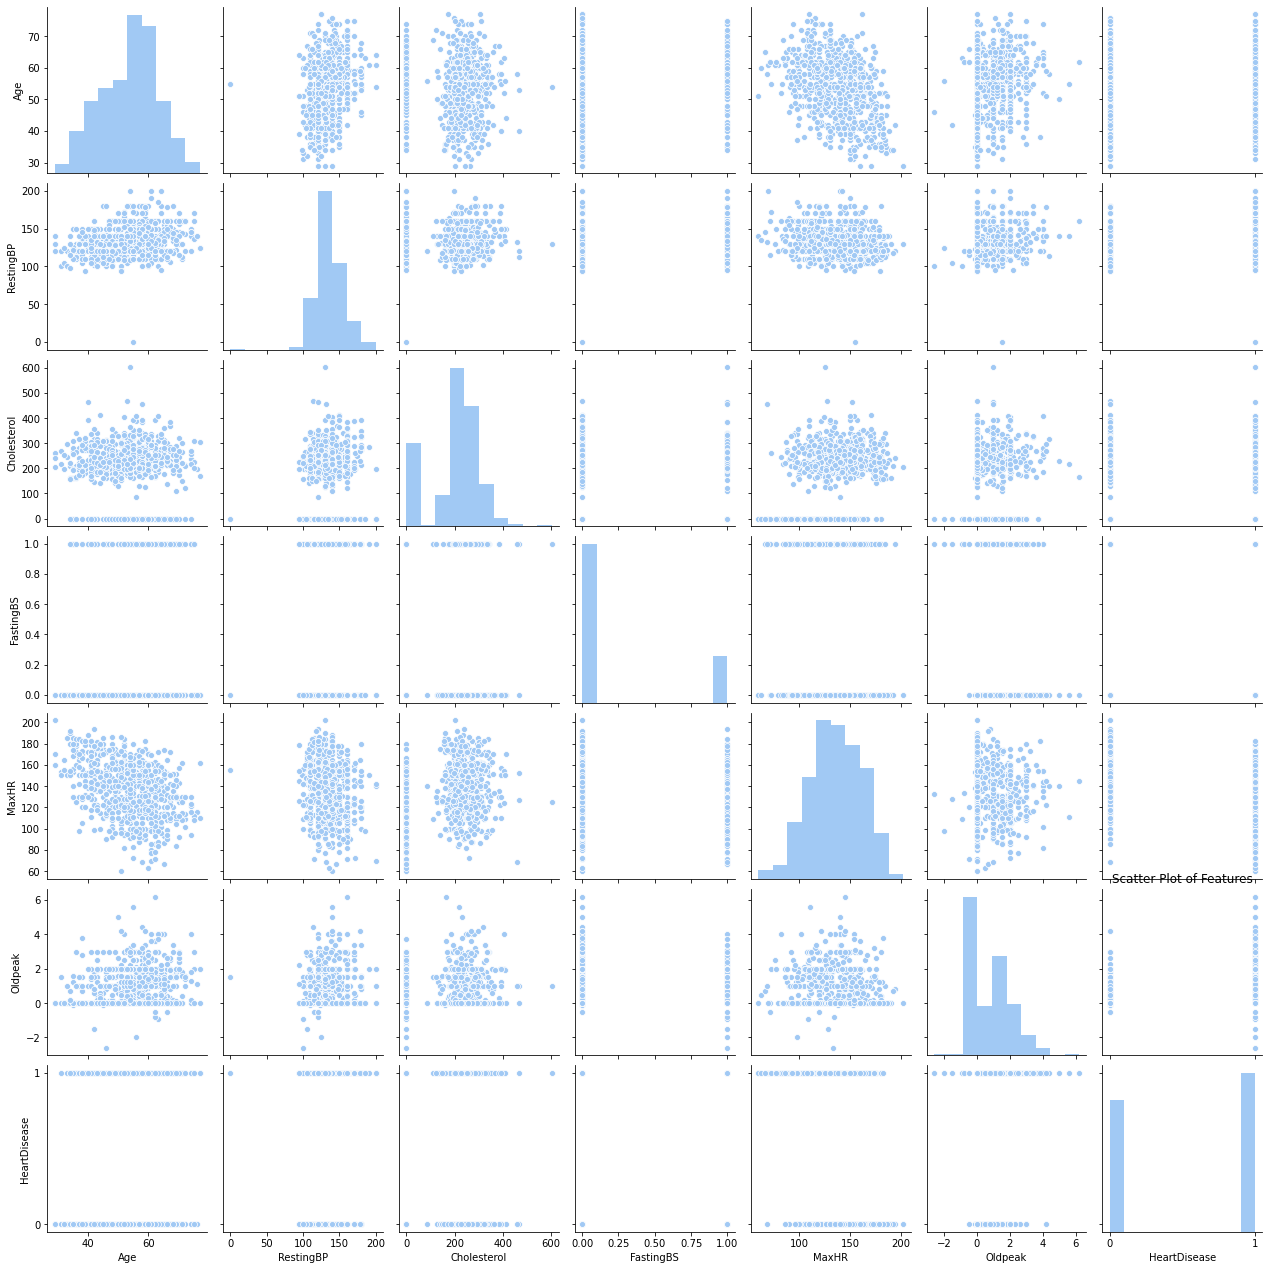

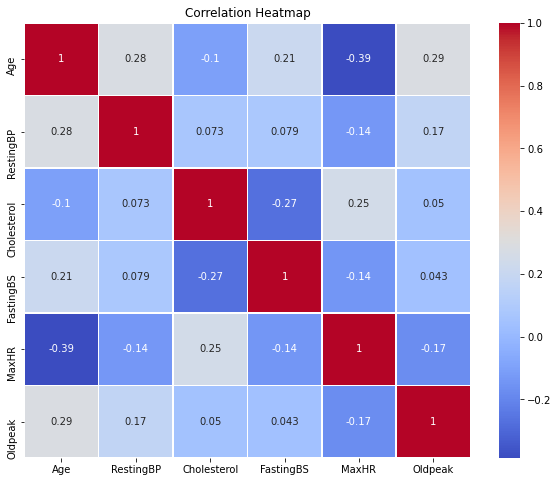

In [39]:
# Scatter plot between pairs of features
sns.pairplot(df2)
plt.title("Scatter Plot of Features")
plt.show()

# Correlation matrix heatmap
correlation_matrix = df2.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [80]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Assuming 'X' contains the feature variables and 'y' contains the target variable
X = pd.get_dummies(df.drop("HeartDisease", axis = 1), columns=categorical_columns)
y = df['HeartDisease']
# Step 1: Split data into training and holdout (test) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Create your logistic regression model
model = LogisticRegression()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Perform k-fold cross-validation
k = 5  # Number of folds for cross-validation
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=k, scoring='accuracy')

# Step 4: Fit the model on the full training set
model.fit(X_train_scaled, y_train)

# Step 5: Make predictions on the test set
y_pred_test = model.predict(X_test_scaled)

# Step 6: Print cross-validation accuracy and test set accuracy
print("Cross-Validation Accuracy Scores:", cv_scores)
print(f"Average Cross-Validation Accuracy: {np.mean(cv_scores):.2f}")
print(f"Test Set Accuracy: {accuracy_score(y_test, y_pred_test):.2f}")

# Step 7: Print confusion matrix for the test set
conf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:")
print(conf_matrix)

Cross-Validation Accuracy Scores: [0.88435374 0.87755102 0.86394558 0.82993197 0.85616438]
Average Cross-Validation Accuracy: 0.86
Test Set Accuracy: 0.85
Confusion Matrix:
[[67 10]
 [17 90]]


In [83]:
df[after_feature]

KeyError: "['ExerciseAngina_N', 'ST_Slope_Up', 'ST_Slope_Flat', 'ExerciseAngina_Y', 'ChestPainType_ASY'] not in index"

In [70]:
df.shape

(918, 12)

In [71]:
df_encoded.shape

(587, 20)

In [81]:
df_encoded = pd.get_dummies(df.drop("HeartDisease", axis = 1), columns=categorical_columns)

In [82]:
df_encoded.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,1,0,0,1,0,0,1,0,1,0,0,0,1


In [78]:
categorical_columns

[]